# Task 6.4

## Table of Content
### 1 Import libraries and datasets
### 2 Data prep for regression analysis
### 3 Regression Analysis
### 4 Conclusion

## 1 Import libraries and datasets

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [4]:
# Create 'path'
path = r'C:\Users\Longus\Documents\Adidas Sales Project - CF'

In [5]:
# Import the 'Adidas US Sales' dataset
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Adidas_US_Sales_6_3.csv'))

In [6]:
df

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [7]:
# Remove column 'Unnamed: 0'
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


## 2 Data prep for regression analysis

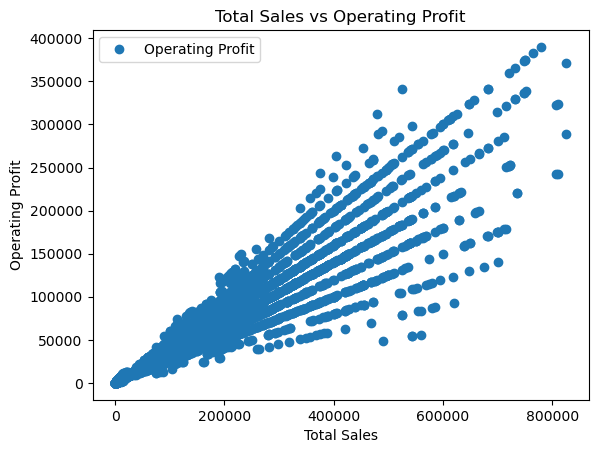

In [13]:
# Create a scatterplot using matplotlib for 'Total Sales' and 'Operating Profit'
df.plot(x = 'Total Sales', y='Operating Profit',style='o')
plt.title('Total Sales vs Operating Profit')  
plt.xlabel('Total Sales')  
plt.ylabel('Operating Profit')  
plt.show()

### Hypothesis: "If the Totale Sales increases, the Operating Profit increase as well."

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Total Sales'].values.reshape(-1,1)
y = df['Operating Profit'].values.reshape(-1,1)

In [11]:
X

array([[600000.],
       [500000.],
       [400000.],
       ...,
       [  7544.],
       [  2940.],
       [  2407.]])

In [12]:
y

array([[300000.  ],
       [150000.  ],
       [140000.  ],
       ...,
       [  2791.28],
       [  1234.8 ],
       [   649.89]])

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3 Regression Analysis

In [15]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

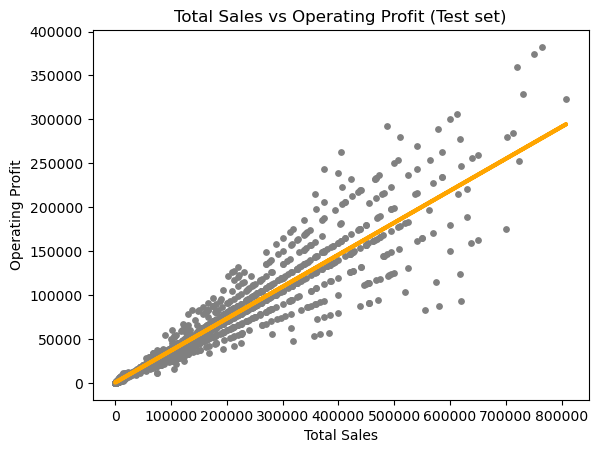

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Total Sales vs Operating Profit (Test set)')
plot_test.xlabel('Total Sales')
plot_test.ylabel('Operating Profit')
plot_test.show()

#### The line seems to fit up until the 200.000 mark on Total Sales axis. Then the data points disperse haevily and there is a lot of variance.

In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [20]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.36417047]]
Mean squared error:  227371246.92591554
R2 score:  0.9200961476900649


In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2698.24,1940.067998
1,4057.56,3252.538388
2,1248.00,1775.462944
3,227.24,514.340592
4,2553.98,2334.100452
5,3049.80,3203.011203
6,1072.26,1204.079470
7,3506.49,5084.680043
8,1512.00,1731.762487
9,52062.50,54525.556132


In [22]:
data.tail(30)

,Actual,Predicted
2865,5127.10,3749.995255
2866,2381.40,2764.185782
2867,1246.56,1436.056062
2868,45500.00,41779.589535
2869,22500.00,27667.983660
2870,8749.05,7134.231472
2871,6217.12,4975.793071
2872,75000.00,91397.816645
2873,30000.00,36772.245515
2874,94500.00,86390.472624


## 4 Conclusion

#### Based on the results of MSE it would seem that the regression model is not the best fit to explore the relationship between 'Total Sales' and 'Operating Profit'.
#### On the other hand R2 value of 0,92 would indicate that the regression model explains the variance in the data well.
#### A potential factor that would skew the results is collection bias. Since the dataset is openly-sourced by multiple contributors we cannot guarantee a bias-free data.
#### Overall, it would be good to explore other factors that could affect the 'Operating Profit' variable. Maybe a different model would be better as well.